 approximate bayesian computation simple rejection method
 for walking we don't know how to reduce our problem to 3 dimensions
 but we want to know approximately what the posterior is in 4d anyway
 maybe we will go on to try ABC in 4 dimensions anyway

In [1]:
import sys, os
import copy
join = lambda *x: os.path.abspath(os.path.join(*x))
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats

import pili
import parameters
import _fj
import fjanalysis
import twanalyse
import rtw
import sobol
import abcimplement
from abcimplement import rejection_abc


In [2]:
notedir = os.getcwd()
root = pili.root
# candidate to compare against
plt.rcParams.update({
    'text.usetex': False,
    'axes.labelsize': 20,
    })
    

In [3]:
all_idx, ltrs = _fj.slicehelper.load_linearized_trs("all")
reference_idx = _fj.load_subset_idx()
objectives = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate']
refdf = fjanalysis.compute_reference_data(ltrs, reference_idx, objectives)

100%|██████████| 3113/3113 [00:01<00:00, 2282.02it/s]
/home/dan/usb_twitching/pili/src/analysis/twanalyse.py:957: RuntimeWarning: invalid value encountered in true_divide
  norm_dy = dy/np.linalg.norm(dy, axis=1)[:,np.newaxis]


In [4]:
subset = "walking"
reference = refdf.iloc[4]
reference


subset            walking
lvel.mean        0.173724
deviation.var    2.652627
qhat.estimate    0.140513
ahat.estimate    0.637112
Name: 4, dtype: object

In [5]:
mc4dw = {}
mc4dw["simdir"] = join(root, "../run/5bfc8b9/cluster/mc4d_walking")
mc4dw["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'fanjin.walking.ks_statistic']
mc4dw = abcimplement.load_problem_simulation(mc4dw)

nan found in lvel.mean. filtering 6 samples
nan found in deviation.var. filtering 6 samples
nan found in qhat.estimate. filtering 6 samples
nan found in ahat.estimate. filtering 6 samples
nan found in fanjin.walking.ks_statistic. filtering 6 samples
failed: Counter({'step_condition': 6})
filtered out 6/10000 samples
loaded data from  /home/dan/usb_twitching/run/5bfc8b9/cluster/mc4d_walking


In [6]:
# print problem
print(mc4dw["problem"])
nsamples = int(1e4)
N = 200 
print("accept {}/{}".format(N,nsamples))


{'num_vars': 4, 'names': ['dwell_time', 'pilivar', 'anchor_angle_smoothing_fraction', 'k_spawn'], 'bounds': [[0.5, 3.0], [1.0, 20.0], [0.125, 1.0], [0.1, 5.0]]}
accept 200/10000


0.04494084831021787
1.1781959201236978
0.14782480082478897
0.11792436911482719
['lvel.mean']
(9994, 1)
['lvel.mean']
N = 200, delta = 0.3723067925662762, target = [3.86561219]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['deviation.var']
(9994, 1)
['deviation.var']
N = 200, delta = 0.0890455964490573, target = [2.25143088]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['qhat.estimate']
(9994, 1)
['qhat.estimate']
N = 200, delta = 0.023729101213224135, target = [0.95053525]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['ahat.estimate']
(9994, 1)
['ahat.estimate']
N = 200, delta = 1.43158482237354, target = [5.40271448]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


['fanjin.walking.ks_statistic']
(9994, 1)
['fanjin.walking.ks_statistic']
N = 200, delta = 0.16081353775930443, target = [0.]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


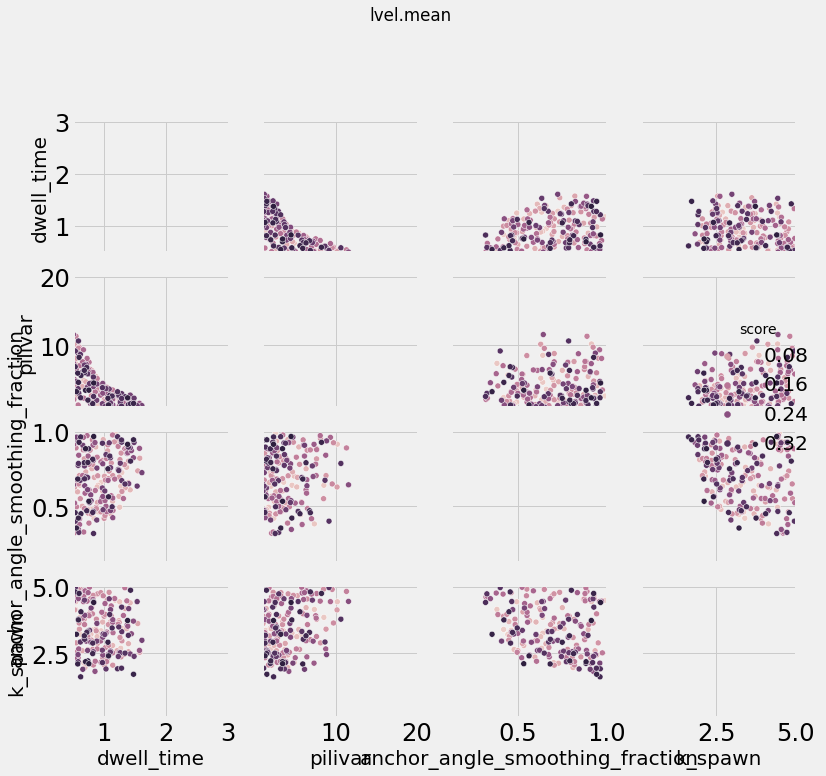

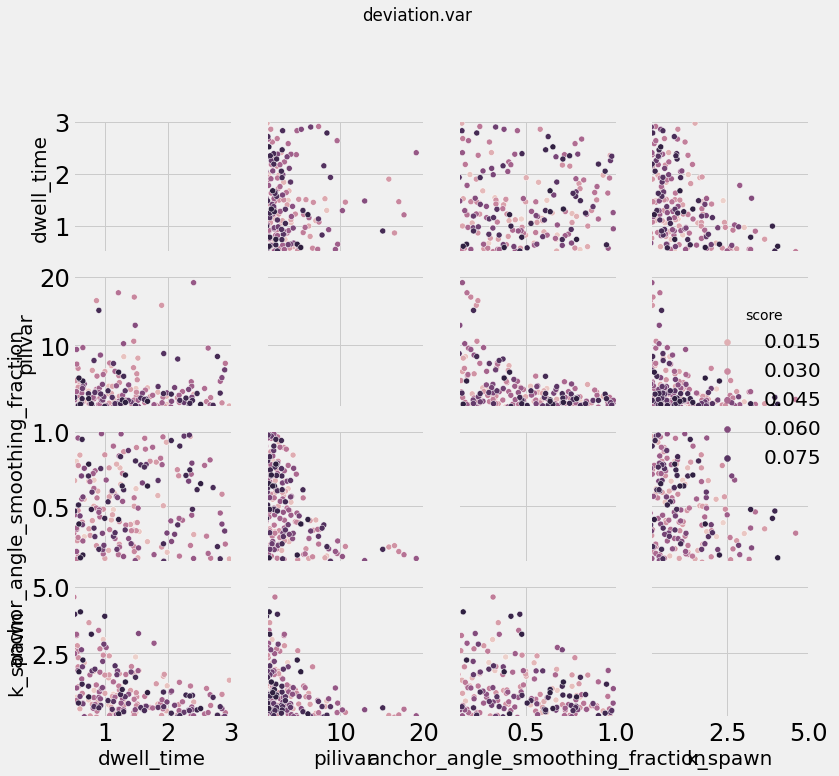

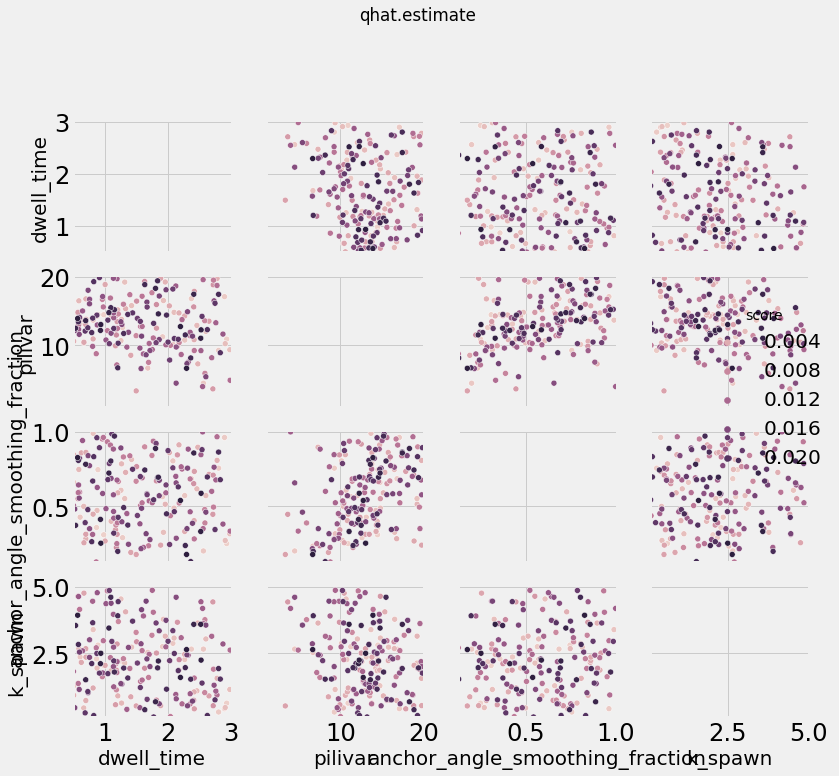

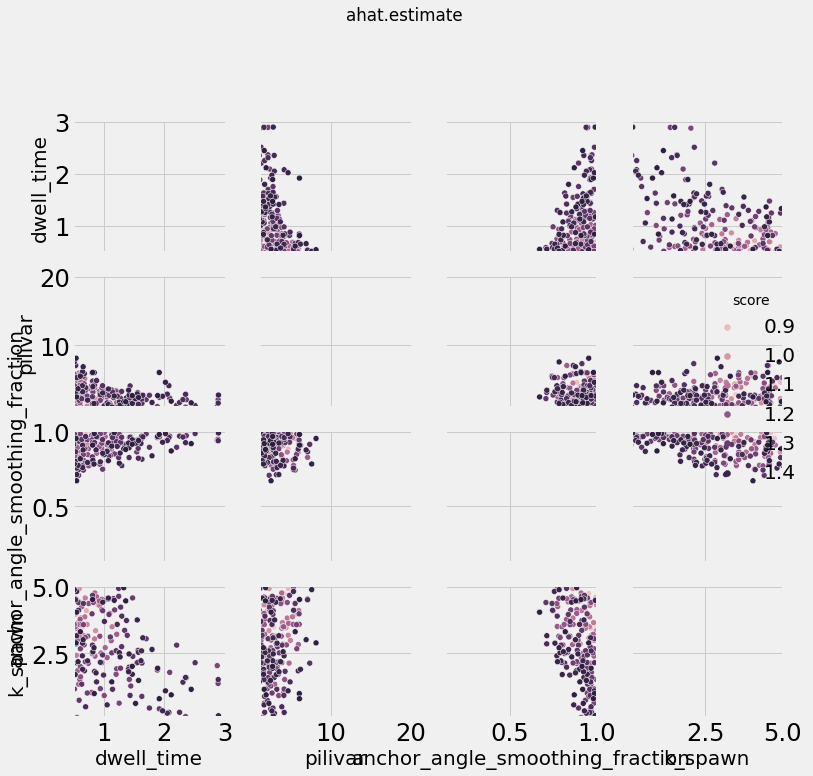

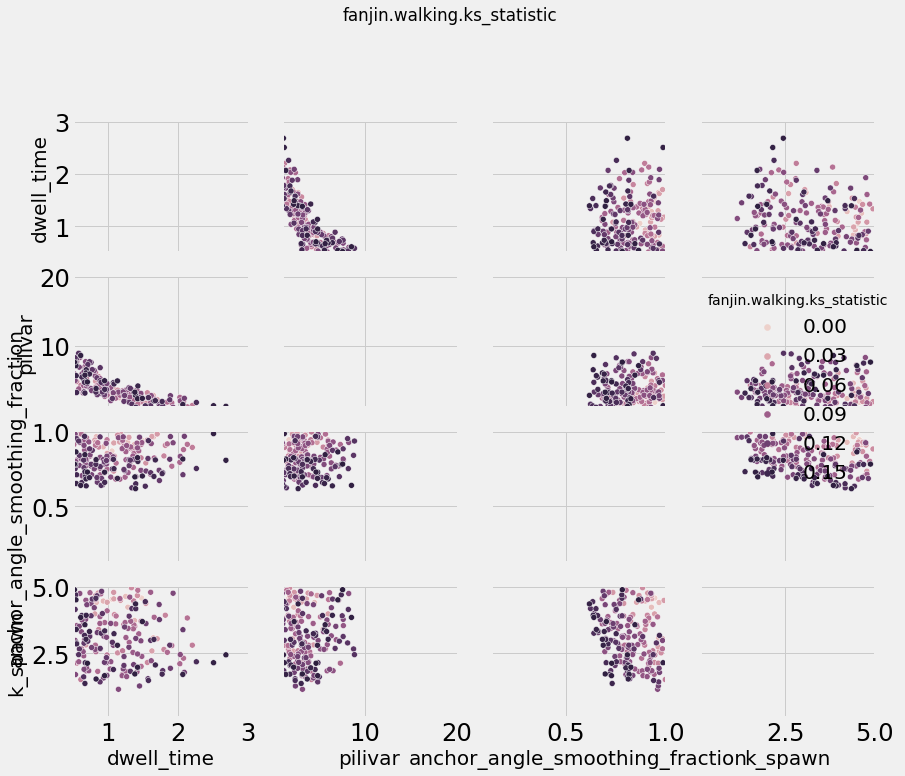

In [7]:
# one statistic at a time
mc4dw["params"] = mc4dw["data"].paramsdf(mc4dw["objectives"])
statdf, statref = abcimplement.regularise_stats(mc4dw["params"], reference, mc4dw["objectives"])
for objective in mc4dw["objectives"]:
    _regdf = statdf[mc4dw["problem"]["names"] + [objective]]
    _accepted = rejection_abc(_regdf, [objective], statref, N)
    # rename = {k:k for k in _accepted.keys()}
    # rename["anchor_angle_smoothing_fraction"] = "anchor"
    # _accepted.rename(columns=rename, inplace=True)
    abcimplement.problemplot4d(mc4dw["problem"], _accepted, objective)
    plt.tight_layout()


 lvel.mean sets good limits on dwell_time, unlike in crawling case !
 * why must anchor parameter be large? surely its less important for walking
   - does the disagreement in anchor parameters imply that the slow crawling is really due to surface interaction?
 Can we interpret anything from ks_statistics?
 to start answering  these questions lets run again with a condition of atleast 1000 linear steps
 and some wider bounds (also velocity threshold on q/a estimator is in place)

In [8]:
new4dw = {}
new4dw["simdir"] = join(root, "../run/825bd8f/cluster/mc4d_walking")
new4dw["objectives"] = ['lvel.mean', 'deviation.var', 'qhat.estimate', 'ahat.estimate', 'fanjin.walking.ks_statistic']
new4dw = abcimplement.load_problem_simulation(new4dw)


nan found in lvel.mean. filtering 185 samples
nan found in deviation.var. filtering 7 samples
nan found in qhat.estimate. filtering 7 samples
nan found in ahat.estimate. filtering 7 samples
nan found in fanjin.walking.ks_statistic. filtering 7 samples
failed: Counter({nan: 178, 'step_condition': 7})
filtered out 185/10000 samples
loaded data from  /home/dan/usb_twitching/run/825bd8f/cluster/mc4d_walking


In [9]:
# print problem
print(new4dw["problem"])
nsamples = int(1e4)
N = 200 
print("accept {}/{}".format(N,nsamples))


{'num_vars': 4, 'names': ['dwell_time', 'pilivar', 'anchor_angle_smoothing_fraction', 'k_spawn'], 'bounds': [[0.05, 3.0], [1.0, 15.0], [0.0625, 1.0], [0.1, 8.0]]}
accept 200/10000


In [10]:
# one statistic at a time
new4dw["params"] = new4dw["data"].paramsdf(new4dw["objectives"])

In [11]:
# statdf, statref = abcimplement.regularise_stats(new4dw["params"], reference, new4dw["objectives"])
statdf, statref = new4dw["params"], reference

In [12]:
accept = {}
for objective in new4dw["objectives"]:
    _regdf = statdf[new4dw["problem"]["names"] + [objective]]
    _accepted = rejection_abc(_regdf, [objective], statref, N)
    accept[objective] = _accepted


['lvel.mean']
(9815, 1)
['lvel.mean']
N = 200, delta = 0.007914532874720992, target = [0.17372389]
['deviation.var']
(9815, 1)
['deviation.var']
N = 200, delta = 0.09088879526769977, target = [2.65262668]
['qhat.estimate']
(9815, 1)
['qhat.estimate']
N = 200, delta = 0.0039274607925471605, target = [0.14051268]
['ahat.estimate']
(9815, 1)
['ahat.estimate']
N = 200, delta = 0.15481832941400847, target = [0.6371117]
['fanjin.walking.ks_statistic']
(9815, 1)
['fanjin.walking.ks_statistic']
N = 200, delta = 0.08429308894551346, target = [0.]


/home/dan/usb_twitching/pili/src/analysis/abcimplement.py:129: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statdf["score"] = score


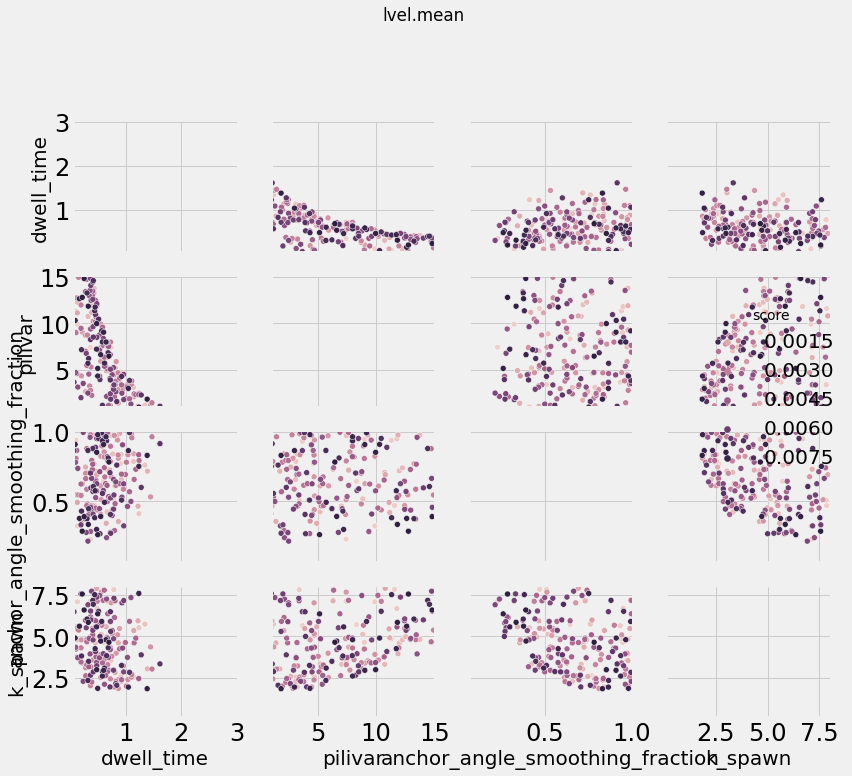

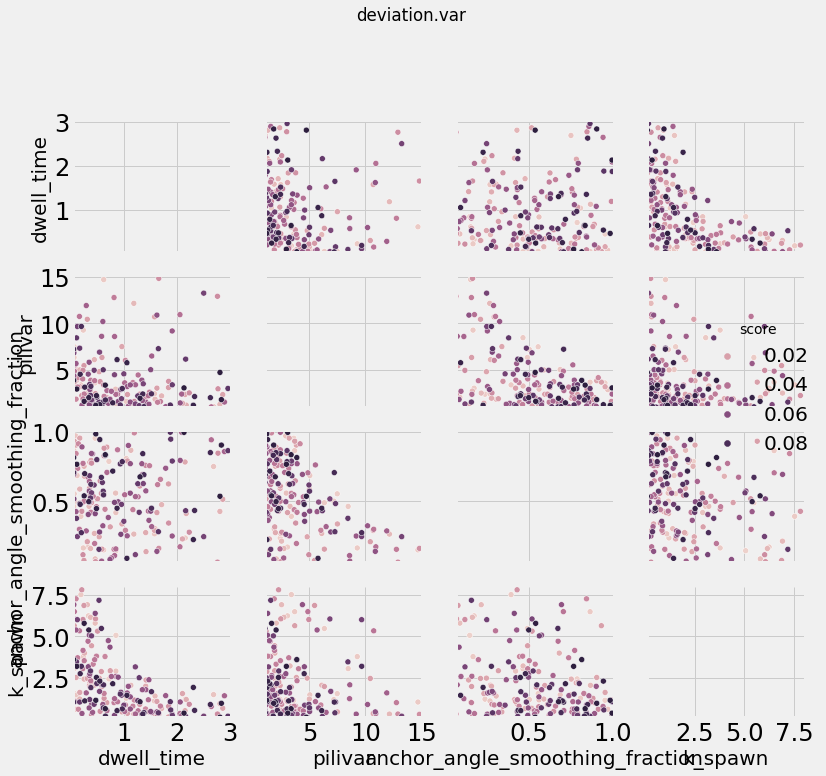

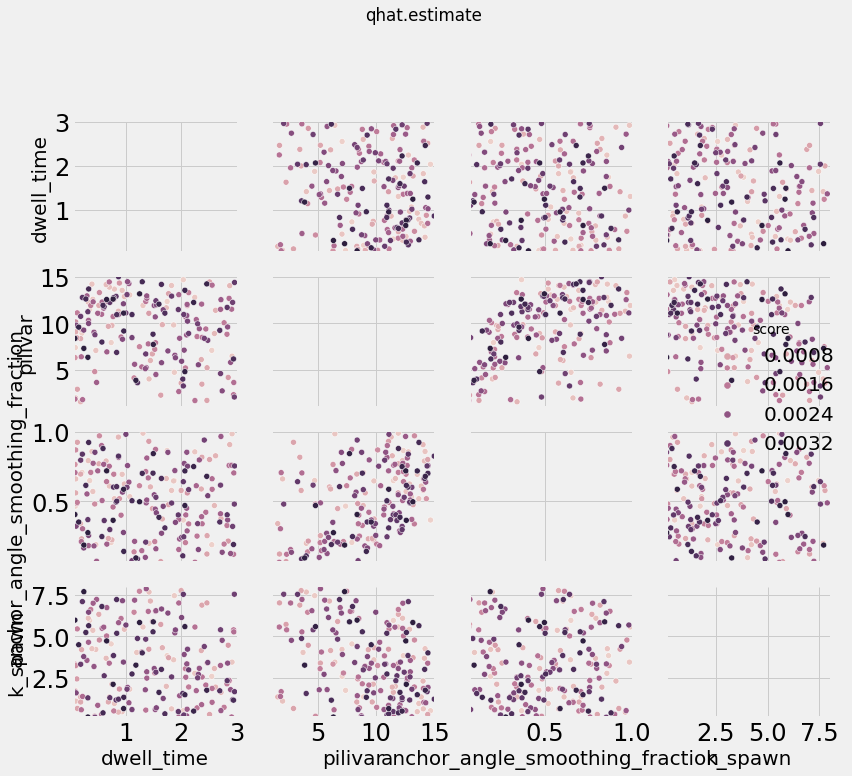

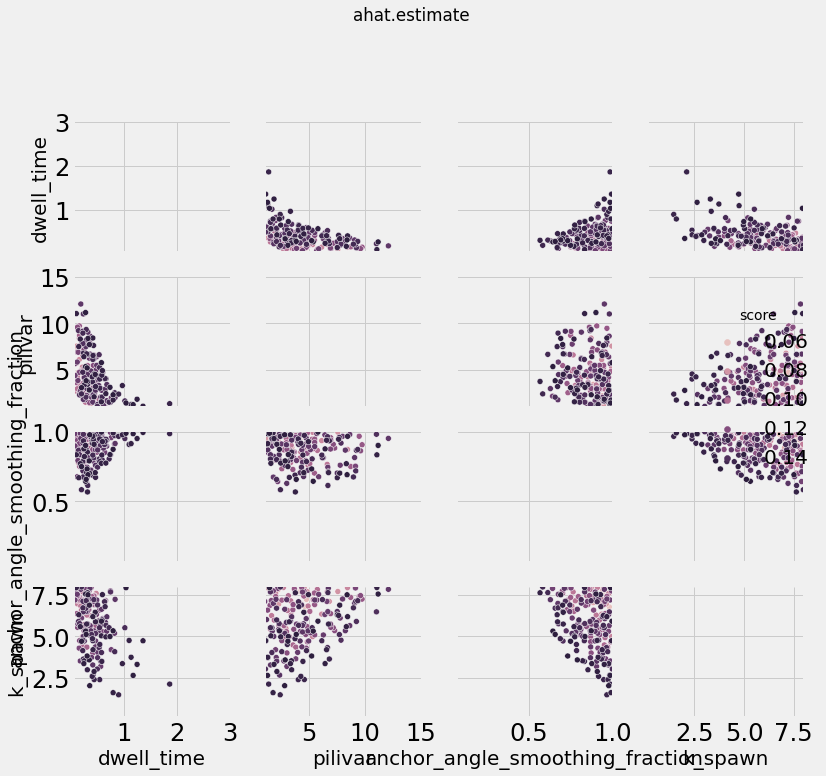

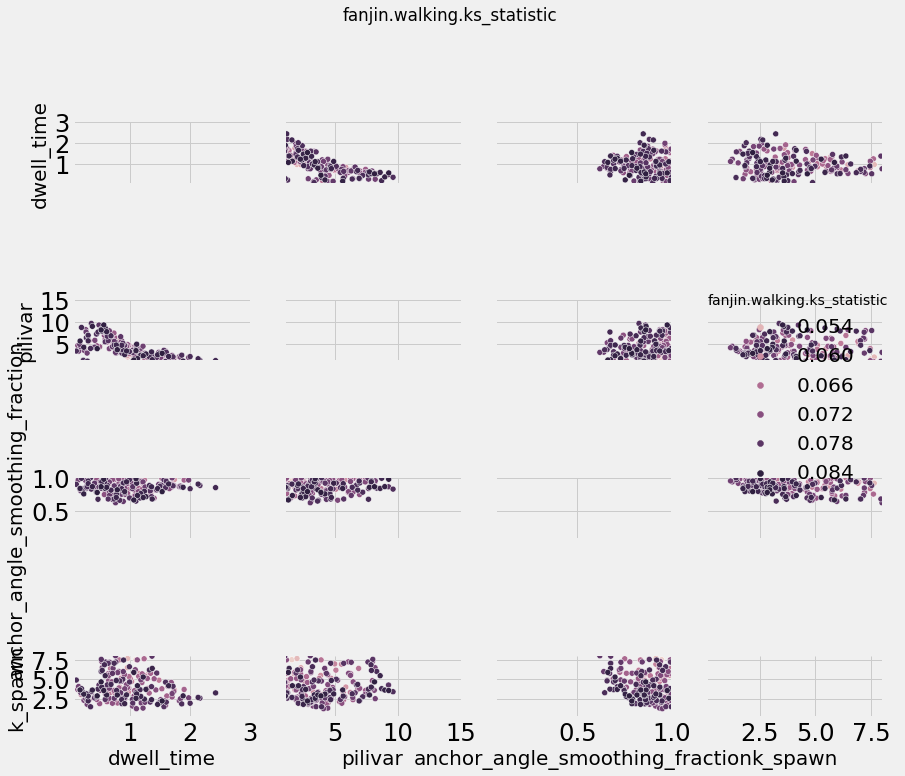

In [13]:
for objective, _accepted in accept.items():
    # rename = {k:k for k in _accepted.keys()}
    # rename["anchor_angle_smoothing_fraction"] = "anchor"
    # _accepted.rename(columns=rename, inplace=True)
    abcimplement.problemplot4d(new4dw["problem"], _accepted, objective)
    plt.tight_layout()


In [14]:
# find me a simulation with low dwell time and matching lvel.mean
lvel_acc = accept["lvel.mean"]
_s = lvel_acc.sort_values("dwell_time")
_s

new4dw["params"].iloc[685]



uid                                _u_8GIgze4L
dwell_time                            0.067328
pilivar                               3.690294
anchor_angle_smoothing_fraction       0.932311
k_spawn                               5.646169
lvel.mean                              0.17394
deviation.var                         2.672594
qhat.estimate                         0.250342
ahat.estimate                         0.400655
fanjin.walking.ks_statistic           0.113151
Name: 685, dtype: object